In [1]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import functools as ft

In [2]:
class Single_qubit_gate():
    def __init__(self):
        #self.num_qubits = num_qubits
        #self.gate_index = gate_index
        return
        
    I = np.eye(2)
    
    def P(self, phi):
        #Phase gate
        return np.exp(1j*phi)*np.eye(2)
    
    H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])

    X = np.array([[0,1],[1,0]])
    Y = np.array([[0,-1j],[1j,0]])
    Z = np.array([[1,0],[0,-1]])
    
def Multi_gate( gate, k, n):
        """
        gate: Single_qubit_gate()
        k: gate qubit index
        n: total number of qubits
        """
        lst = [np.eye(2) if j != k else gate for j in range(n)]
        return ft.reduce(np.kron, lst)

def Multi_CNOT(k1, k2, n):
    cnot0 = np.array([[1,0],[0,0]])
    cnot1 = np.array([[0,0],[0,1]])
    cnotx = np.array([[0,1],[1,0]])
    
    lst1 = [np.eye(2) if j != k1 else cnot0  for j in range(n)]
    lst2 = [cnot1 if j == k1 else cnotx if j == k2 else np.eye(2) for j in range(n) ]
    return ft.reduce(np.kron,lst1) + ft.reduce(np.kron,lst2)


    
class State:
    def __init__(self, num_qubits, init_state = 0):
        self.num_qubits = num_qubits
        self.basis = list(it.product(range(2), repeat=num_qubits))
        
        #Initialise the state in the ground state (0,0,0)
        self.tensor = np.zeros([2 for i in range(num_qubits)],dtype=complex)
        self.tdim = self.tensor.shape
        self.tdim_flat = 2**self.num_qubits
        self.tensor[self.basis[init_state]] = 1

    #def get_probabilities(self):
     #   probs = np.abs(self.tensor)**2
      #  self.probabilities = probs

    def apply_single_qubit_gate(self, gate, k):
        multigate = Multi_gate(gate, k, self.num_qubits)
        self.tensor = (multigate @ self.tensor.reshape(self.tdim_flat)).reshape(self.tdim)

    def apply_cnot_qubit_gate(self, k1,k2):
        multigate = Multi_CNOT(k1,k2, self.num_qubits)
        self.tensor = (multigate @ self.tensor.reshape(self.tdim_flat)).reshape(self.tdim)

    def plot_state(self):
        #num_basis_states = 2**(self.num_qubits)
        #try: 
         #   self.probabilities
        #except: 
            #self.get_probabilities()

        probs = np.abs(self.tensor)**2
                    
        plt.bar(range(self.tdim_flat) ,probs.reshape(self.tdim_flat))
        #plt.bar(range(num_basis_states) ,self.probabilities)

        plt.xlabel('Basis state number')
        plt.ylabel('Probability')

        
       

## Initialise the $\ket{000}$ state

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


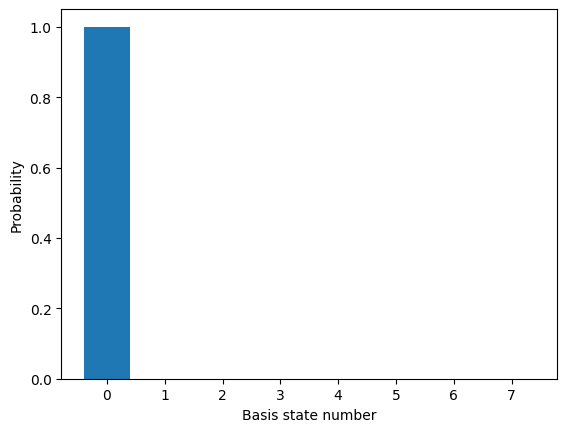

In [3]:
state = State(3)
print(state.basis)
state.plot_state()



## Apply some single mode gates 
(I always initialise the $\ket{000}$ state)

(1, 0, 0)


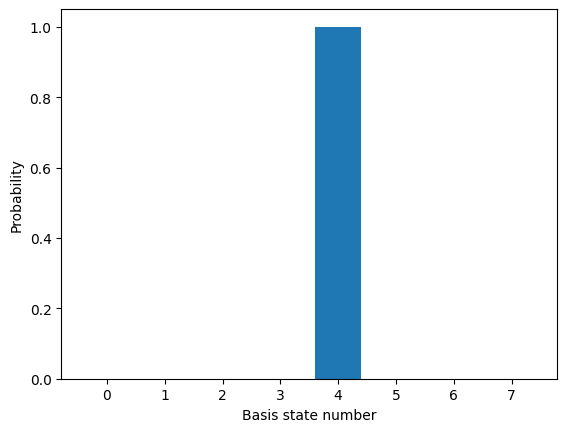

In [4]:
## Apply an X gate on mode 0
num = 3
state = State(num)

H_gate = Single_qubit_gate().H
I_gate = Single_qubit_gate().I
P_gate = Single_qubit_gate().P(np.pi)
X_gate = Single_qubit_gate().X

state.apply_single_qubit_gate(X_gate, 0)
print(state.basis[4])

state.plot_state()


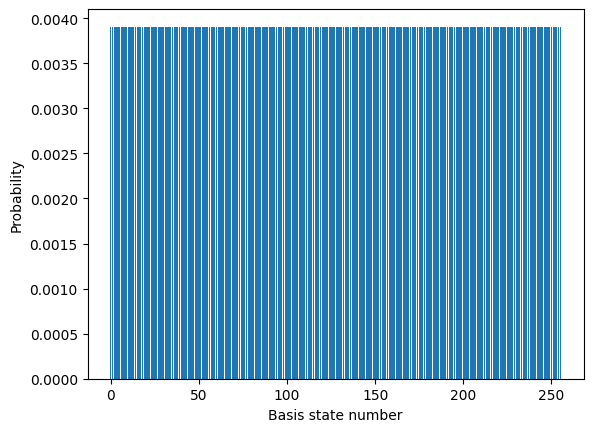

In [5]:
## Apply Hadamard gate on all qubits
num = 8
state = State(num)

H_gate = Single_qubit_gate().H
I_gate = Single_qubit_gate().I
P_gate = Single_qubit_gate().P(np.pi)
Y_gate = Single_qubit_gate().Y

[state.apply_single_qubit_gate(H_gate, i) for i in range(0,num)]
#state.apply_single_qubit_gate(Y_gate, 2)

state.plot_state()


## Apply a two-mode gate

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


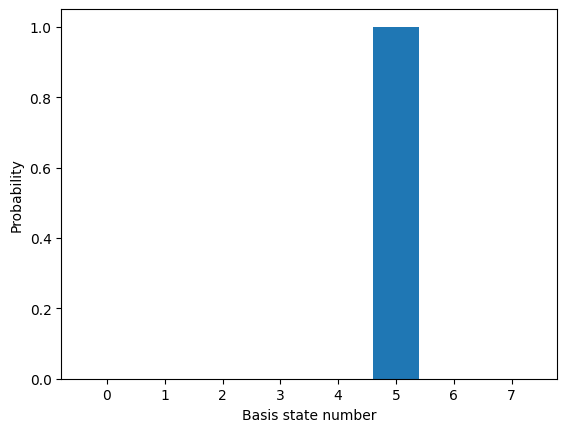

In [6]:
state = State(3, init_state = 4) #Initialise state in #100 
print(state.basis)
state.apply_cnot_qubit_gate(0,2)
state.plot_state()

In [10]:
%%timeit
state = State(3)
#print(state.basis)
state.apply_single_qubit_gate(H_gate, 0)
state.apply_cnot_qubit_gate(0,2)
#state.plot_state()

64.3 μs ± 2.66 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
Multi_CNOT(0,2,3)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

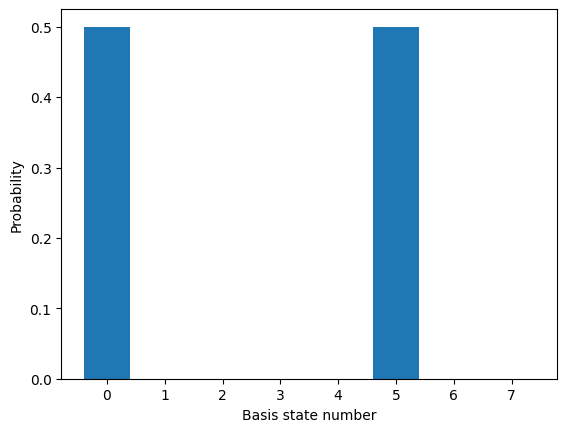

In [12]:
state = State(3)
#print(state.basis)
state.apply_single_qubit_gate(H_gate, 0)
state.apply_cnot_qubit_gate(0,2)
state.plot_state()